WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.



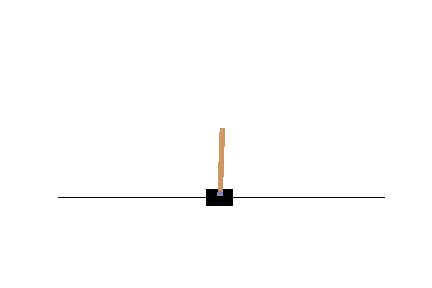
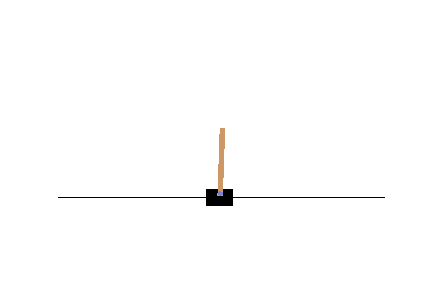
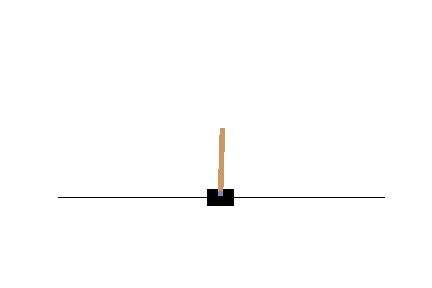
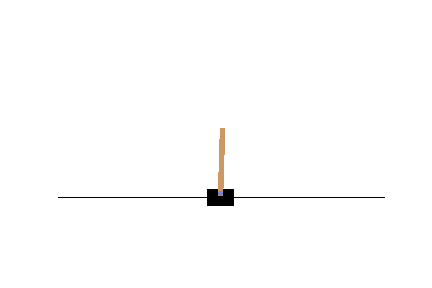
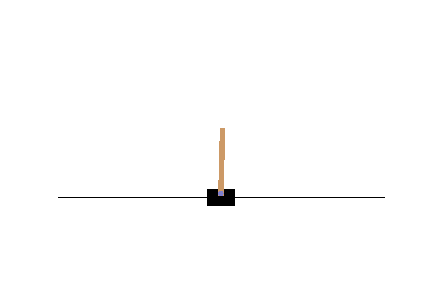
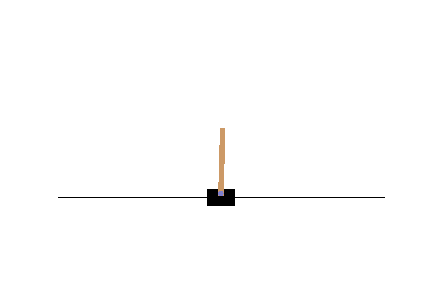
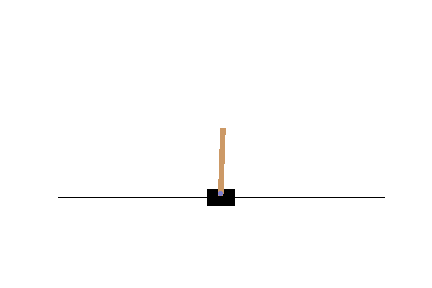
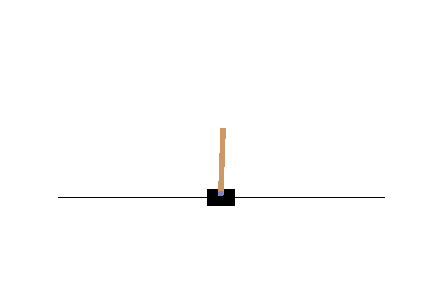
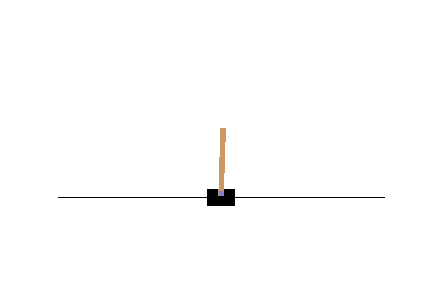
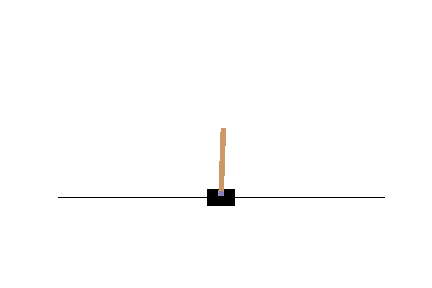
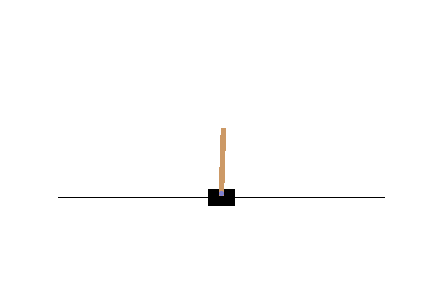
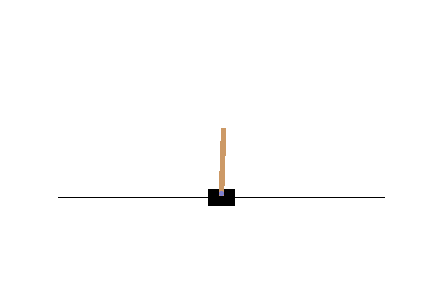
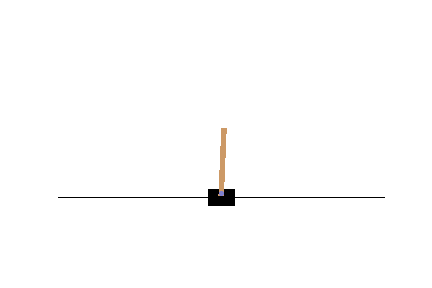
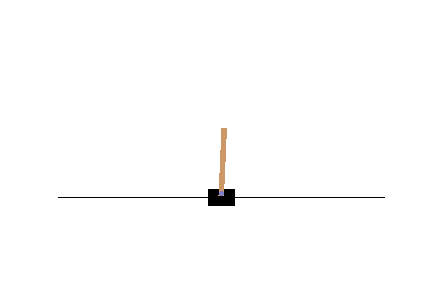
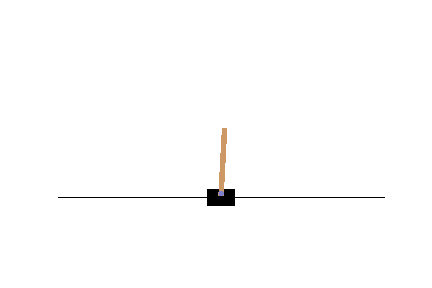
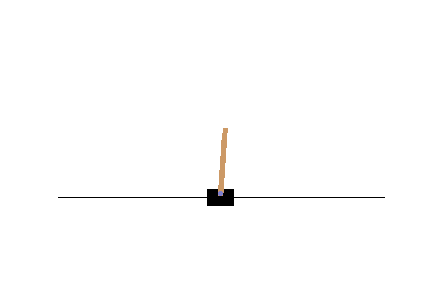
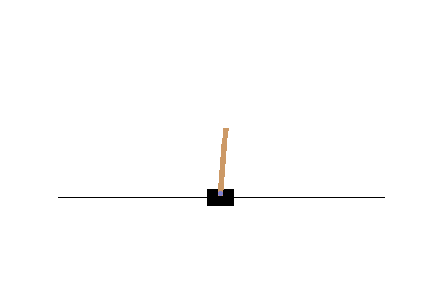
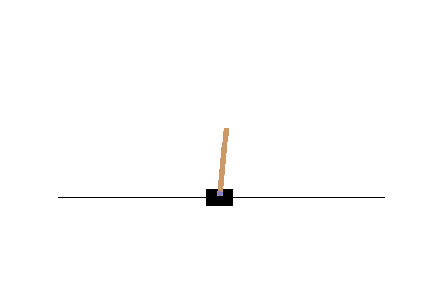
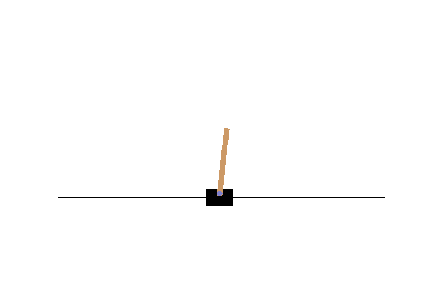
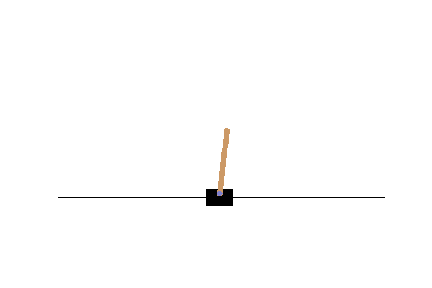
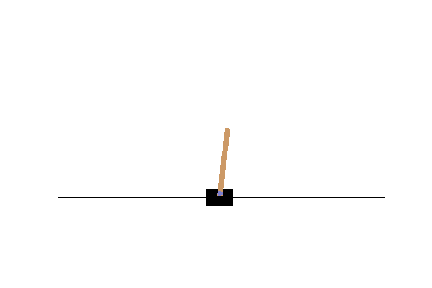
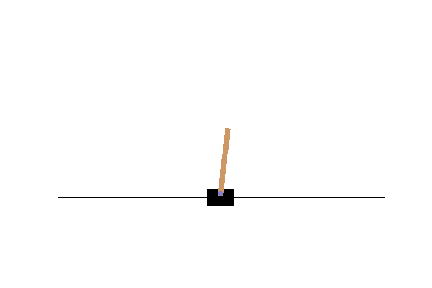
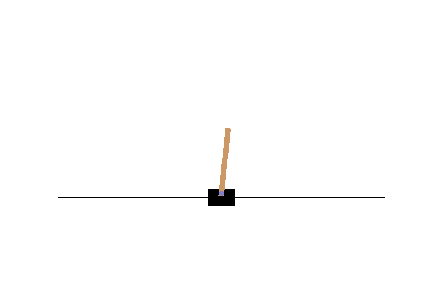
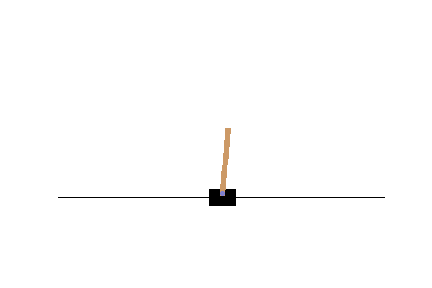
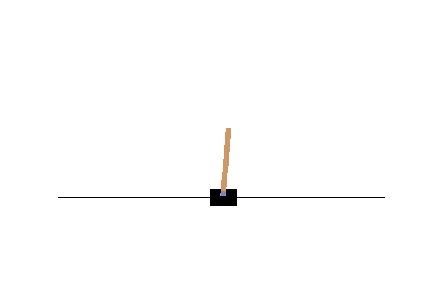
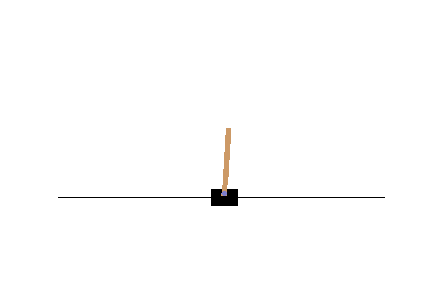
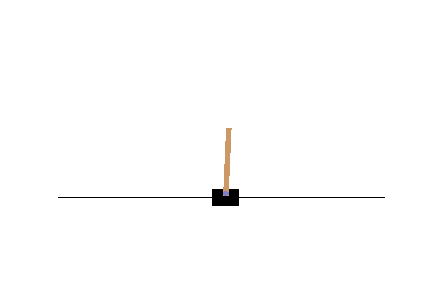
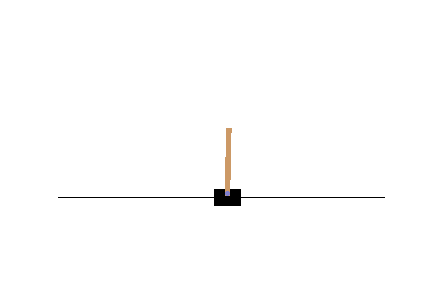
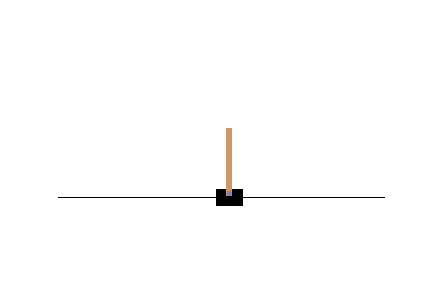
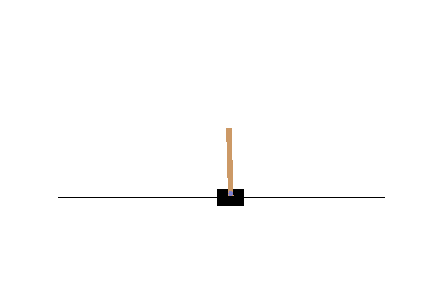
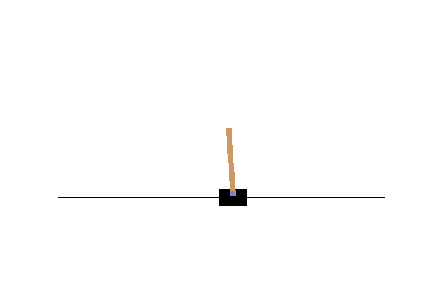
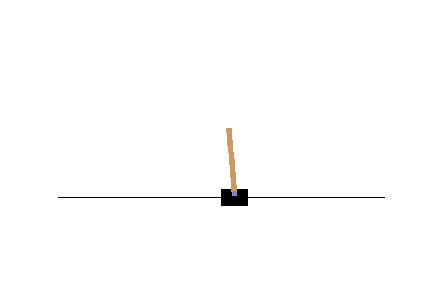
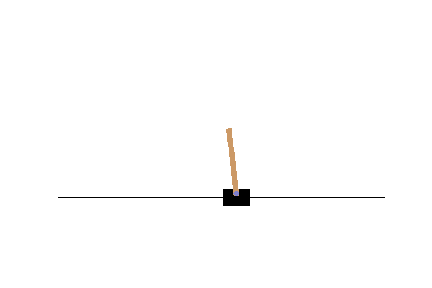
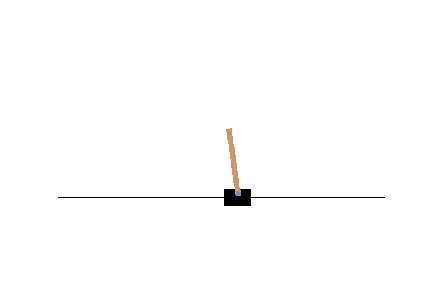
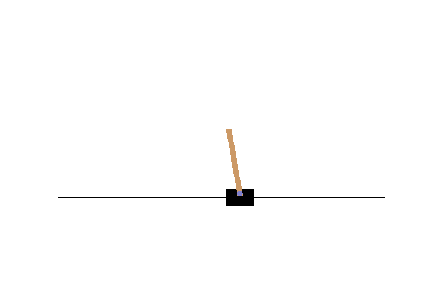
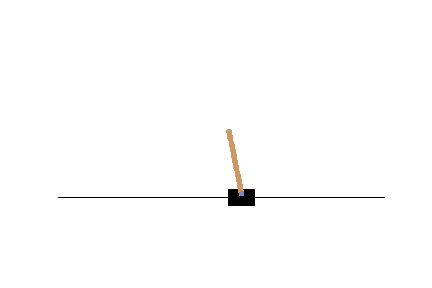

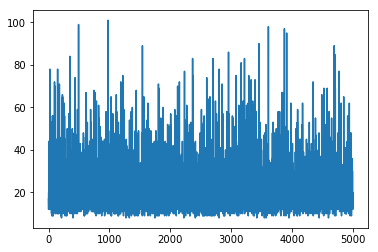

In [2]:
import gym
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Imports specifically so we can render outputs in Jupyter.
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display


def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=100)
    display(display_animation(anim, default_mode='loop'))

def index_x(val):
    r = int(np.sign(val) * np.log(np.absolute(val)*120+1)/0.11332868530700327 + 50.5)
    if r < 0:
        return 0
    if r > 99:
        return 99
    return r

def index_theta(val):
    r = int(np.sign(val) * np.log(np.absolute(val)*1162.6004999999986+1)/0.1099838565275042 + 50.5)
    if r < 0:
        return 0
    if r > 99:
        return 99
    return r

# Learning parameters
num_episodes = 5000
y = 0.5
e = 0.1
pass_line = 200

env = gym.make('CartPole-v0')

resolution = 100
x_threshold = 2.4
theta_threshold_radius = 12 * 2 * math.pi / 360
x_step = 2 * x_threshold / resolution
theta_step = 2 * theta_threshold_radius / resolution

# Initialize a huge Q table
Q = np.random.uniform(0,0.01,(resolution, resolution, resolution, resolution, env.action_space.n))

# Statistics
r_list = []

for i in range(num_episodes):
    
    # Run the environment
    s = env.reset()
    cum_reward = 0

    for t in range(1000):
        
        # Round to nearest
        x = index_x(s[0])
        x_dot = index_x(s[1])
        theta = index_theta(s[2])
        theta_dot = index_theta(s[3])
        
        #print(s)
        #print(x)
        #print(x_dot)
        
        if np.random.rand() < e:
            a = env.action_space.sample()
        else:
            a = np.argmax(Q[x, x_dot, theta, theta_dot])
        
        s1,r,d,_ = env.step(a)
        cum_reward += r
        x1 = index_x(s1[0])
        x1_dot = index_x(s1[1])
        theta1 = index_theta(s1[2])
        theta1_dot = index_theta(s1[3])
        Q[x, x_dot, theta, theta_dot, a] += 0.1 * (r + y * (np.max(Q[x1, x1_dot, theta1, theta1_dot])))
        s = s1
        if d:
            break;

    r_list.append(cum_reward)

    
s = env.reset()
cum_reward = 0
frames = []
for t in range(5000):
    
    x = index_x(s[0])
    x_dot = index_x(s[1])
    theta = index_theta(s[2])
    theta_dot = index_theta(s[3])
    a = np.argmax(Q[x, x_dot, theta, theta_dot])
    
    # Render into buffer. 
    frames.append(env.render(mode = 'rgb_array'))
    s, r, d, _ = env.step(a)
    
    if d:
        break

display_frames_as_gif(frames)
env.close()

plt.plot(r_list)
#print(Q)

In [ ]:
import gym
env = gym.make('CartPole-v0')
s = env.reset()
print(s)
print(env.action_space)
print(env.action_space.n)
print(env.action_space.contains(2))

In [ ]:
import numpy as np
import math
#from IPython.core.debugger import set_trace

S = 2.4 #12 * 2 * math.pi / 360
a = 0.001
res = 100
n = res/2
delta = 1.0
threshold = 0.000000001
x_n = 5

#set_trace()
while delta > threshold:
    x_n1 = x_n - (np.power(x_n,50.0)-S*x_n/a+S/a-1)/(50.0*np.power(x_n,49.0)-S/a)
    delta = np.power(x_n1,50.0)-S*x_n1/a+S/a-1.0
    x_n = x_n1
print(x_n)
print(delta)

q = x_n #1.11626005
xx = np.linspace(-S,S,1000)
print(q/a-1/a)
print(np.log(q))
for x in xx:
    #print(x)
    y = int(np.sign(x) * np.log(np.absolute(x)*(q/a-1/a)+1)/np.log(q) + 50)
    print("%10.8f    : %d " % (x, y))